# Data Interpreter


In this notebook we will examine and work with the data we have got from the notebooks Data Miner and Data Processing.

The final output will be a graph depicting the outcome of our different investments strategies.




## Importing 

We import json and pandas to process the index structure from files: 'clear_timeseries.json', 'clear_financials.json', 'clear_overview.json'



In [766]:
import json
import pandas as pd
from datetime import datetime

# Function "Create portfolio"

This function works with the external json files stated above and returns a list of company´s ticker symbols according to the parameters given.

### Parameters: 

#### Index 
'^GSPC'= S&P500,'^NDX'= Nasdaq, '^DJI' = DowJones
#### Year  
2001-2019
#### Parameter 
'priceToEarningsRatio' (PE ratio), 'marketCapitalization' (market cap), 'netIncome' (net income), Industry and Sector out of the following lists

##### Industry 
{'Financial Data & Stock Exchanges', 'Telecom Services', 'Oil & Gas E&P', 'Pharmaceutical Retailers', 'Other', 'Software-Application', 'Internet Content & Information', 'Electrical Equipment & Parts', 'Insurance-Life', 'Semiconductor Equipment & Materials', 'Utilities-Regulated Gas', 'Staffing & Employment Services', 'Shell Companies', 'Biotechnology', 'Computer Hardware', 'Information Technology Services', 'Agricultural Inputs', 'Broadcasting', 'Specialty Retail', 'Resorts & Casinos', 'REIT-Office', 'Utilities-Regulated Water', 'Utilities-Regulated Electric', 'Electronic Components', 'Oil & Gas Integrated', 'Personal Services', 'Steel', 'Building Products & Equipment', 'Oil & Gas Equipment & Services', 'Semiconductors', 'Insurance Brokers', 'Aerospace & Defense', 'Software-Infrastructure', 'Asset Management', 'Credit Services', 'Consumer Electronics', 'Beverages-Non-Alcoholic', 'Oil & Gas Midstream', 'Tobacco', 'Healthcare Plans', 'Specialty Industrial Machinery', 'REIT-Healthcare Facilities', 'Gold', 'Trucking', 'Utilities-Diversified', 'Apparel Retail', 'Oil & Gas Drilling', 'Rental & Leasing Services', 'Scientific & Technical Instruments', 'Apparel Manufacturing', 'Industrial Distribution', 'Packaging & Containers', 'Electronic Gaming & Multimedia', 'Auto Parts', 'Capital Markets', 'Medical Care Facilities', 'Gambling', 'REIT-Retail', 'Communication Equipment', 'Internet Retail', 'Medical Devices', 'Integrated Freight & Logistics', 'Footwear & Accessories', 'Financial Conglomerates', 'Drug Manufacturers-Specialty & Generic', 'Restaurants', 'Specialty Business Services', 'Diagnostics & Research', 'Drug Manufacturers-General', 'Other Industrial Metals & Mining', 'Medical Instruments & Supplies', 'Specialty Chemicals', 'REIT-Industrial', 'Insurance-Property & Casualty', 'Packaged Foods', 'Security & Protection Services', 'Chemicals', 'Beverages-Brewers', 'Banks-Regional', 'Auto Manufacturers', 'Confectioners', 'Luxury Goods', 'Travel Services', 'Furnishings, Fixtures & Appliances', 'Entertainment', 'Consulting Services', 'Farm Products', 'Home Improvement Retail', 'Insurance-Specialty'} 

##### Sector  
{'Financial Services', 'Communication Services', 'Energy', 'Healthcare', 'Other', 'Technology', 'Industrials', 'Utilities', 'Basic Materials', 'Consumer Cyclical', 'Real Estate', 'Consumer Defensive'}

#### Criterion
'highest', 'lowest', 'whole' > this is to determine if we want companies with biggest market capitalization or for instance lowest PE ratio, whole stands for all the tickers in particular index and year

#### Size
1:20 > number of companies selected



In [770]:
index_lists=pd.read_json('clear_timeseries.json') # converts the json processed file into pandas dataframe
financial_lists=pd.read_json('clear_financials.json')
company_overview_list=pd.read_json('clear_overview.json')


create_portfolio('^DJI',2019,'marketCapitalization','highest',5) 

'MSFT', 'JPM', 'JNJ', 'WMT', 'INTC'



# Portfolio design and timeseries

In this part we will work with several functions in order to buy positions in companies emerging from function "create portfolio" so we could sell them next year and analyse the changes in invested capital



## Importing and loading 

We import matplotlib for the future graphical procedures a we load our desired json files 

In [771]:
import matplotlib.pyplot as plt

with open('clear_financials.json', 'r') as fin_f, \
    open('clear_time_series_monthly_adjusted.json', 'r') as month_f: 
    financials = json.load(fin_f)
    monthly_adjusted = json.load(month_f)

With this for cyclus we create a complex dictionary with tickers and dates as keys and finaly prices as values

In [ ]:
for company, prices in monthly_adjusted.items():
    temp = {}
    for date, price in prices.items():
        temp[datetime.strptime(date, '%Y-%m-%d')] = float(price)
    monthly_adjusted[company] = temp

## Function "Get price from year start"

In this function we have symbol (ticker) and year (2001-2019) as inputs and the price of stock on the first day of the year as an output (that is the purpose of the part: min(year_prices) > return tne "smallest" (first) date of the year given), if the ticker is not found in the file, then it returns 0


In [774]:
get_price_from_year_start('MSFT', 2018)

## Function "Get companies market cap dict"

In this function we have symbols (list of tickers) and year (2001-2019) as inputs and the market cap of all the companies (tickers) as an output which is a dictionary with tickers as keys and market caps as values, this we need in order to calculate weights in our structure of portfolio (which is measured by the market cap of the company)

In [ ]:
get_companies_market_cap_dict(['MSFT', 'JPM', 'JNJ', 'WMT', 'INTC'], 2010)

## Function "Buy portfolio"

This is one of the crucial functions of this notebook. It takes list of tickers from the function "Create portfolio" according to the parameters and criterions selected, then it has year and budget (in dollars > we set 100 dollars as a default amount of our analysis) as its inputs.

It calculates the total sum of market capitalization of all the companies. If the price of the company´s stock in a given year is not zero (it is in our file of stock price timeseries) and the same for the next year (if it was 0 in the next year it would be sold for nothing and we would lose money for no reason), then we assing the appropriate number of stocks to this company (theoretically buying the position) and create a dictionary of tickers (symbols) and belonging number of stocks held.



In [ ]:
buy_portfolio(['MSFT', 'JPM', 'JNJ', 'WMT', 'INTC'], 2009, 100)

## Function "Sell portfolio"

Here we sell our position from the given portfolio structure (dictionary) and year by simply multiplying the actual price (from the first day of the year) by number of shares we possess.




In [ ]:
sell_portfolio(portfolio, 2002)

## Function "Invest"

This is the main function of our notebook. We put together all the auxiliary function above.

We will create a dictionary (portfolio_history) of years as keys (starting with the year stated in the function) and the total value of our portfolio after selling it the belonging year.

We give the function index, starting year, parameter, criterion, size and budget with the same sense as for the function "create portfolio" and then we use it to give us the list of tickers. We call "buy portfolio" and "sell portfolio" for each year and finally return the dictionary portfolio_history and all the parameters given (we will work with them in the graphs).



In [780]:
invest('^DJI',2009,'marketCapitalization','highest',5,100)       

## Function "Plot"

This is the main graphical function of the notebook.

It takes the same inputs as "Invest" and a color (to distinguish between the lines of different portfolios).

It takes the outputs portfolio_history and its inputs from function "Invest" and with matplotlib it transfers them into a linear graph with years on x-axis and total values of the portfolios in those years on the y-axis.


In [ ]:
def plot ('^DJI',2009,'marketCapitalization','highest',5,100,'bo-'):

## Conclusion

This part plots several different index combinations starting with year 2001.

After thorough analysis we have selected the six combination to show the approximate strategies that we could have chosen in the year 2001.

We call the function plot on all those combinations. We add a legend to the graph and finaly we display it.

In conclusion, the best strategy that we have found is that the Nasdaq index behave better than the other two main indexes over the last two decades. We have been trying to find the best possible combination and we have ended up with the blue line representing it. If you would invest in the 3 biggest companies by market cap each year and then you would sell and buy the new 3 biggest year after you would end up with more than 1000 dollars out of the 100 invested at the beggining, which is quite a good result. In comparison, the S&P500 finished with around 600 dollars out of 100 invested.

We have tracked the Health and Technology sectors to enlarge the perspective for us.

In the end, we know that we could make this better by using recursion and computing all the combination possible and maybe we would find something even better, this we leave for our later studies.



In [ ]:
plot('^NDX',2001,'marketCapitalization','highest',3,100,'bo-') 
plot('^GSPC',2001,'priceToEarningsRatio','whole',3,100,'ro-')
plot('^NDX',2001,'priceToEarningsRatio','whole',3,100,'go-') 
plot('^DJI',2001,'priceToEarningsRatio','whole',3,100,'yo-')
plot('^GSPC',2001,'Technology','whole',3,100,'ko-')
plot('^GSPC',2001,'Healthcare','whole',3,100,'mo-')

plt.xticks(list(portfolio_history.keys()))  
plt.rc('figure', figsize=(25, 25))
plt.legend(fontsize=15,loc='best')
plt.show()

In [ ]:
import json
import pandas as pd
from datetime import datetime



index_lists=pd.read_json('clear_timeseries.json') # converts the json processed file into pandas dataframe

financial_lists=pd.read_json('clear_financials.json')

company_overview_list=pd.read_json('clear_overview.json')


#INSTRUCTIONS:
# index = '^GSPC' (S&P)>2000-2019, '^NDX' (Nasdaq)>2000-2019, '^DJI' (dowjones)>2004,2008,2009,2012,2013,2015,2017,2018,2019,2020
# year = 2000-2019
# parameter = 'priceToEarningsRatio' (P/E), 'marketCapitalization' (market cap), 'netIncome' (net income), 'Industry' (['Financial Data & Stock Exchanges', 'Telecom Services', 'Oil & Gas E&P', 'Pharmaceutical Retailers', 'Other', 'Software-Application', 'Internet Content & Information', 'Electrical Equipment & Parts', 'Insurance-Life', 'Semiconductor Equipment & Materials', 'Utilities-Regulated Gas', 'Staffing & Employment Services', 'Shell Companies', 'Biotechnology', 'Computer Hardware', 'Information Technology Services', 'Agricultural Inputs', 'Broadcasting', 'Specialty Retail', 'Resorts & Casinos', 'REIT-Office', 'Utilities-Regulated Water', 'Utilities-Regulated Electric', 'Electronic Components', 'Oil & Gas Integrated', 'Personal Services', 'Steel', 'Building Products & Equipment', 'Oil & Gas Equipment & Services', 'Semiconductors', 'Insurance Brokers', 'Aerospace & Defense', 'Software-Infrastructure', 'Asset Management', 'Credit Services', 'Consumer Electronics', 'Beverages-Non-Alcoholic', 'Oil & Gas Midstream', 'Tobacco', 'Healthcare Plans', 'Specialty Industrial Machinery', 'REIT-Healthcare Facilities', 'Gold', 'Trucking', 'Utilities-Diversified', 'Apparel Retail', 'Oil & Gas Drilling', 'Rental & Leasing Services', 'Scientific & Technical Instruments', 'Apparel Manufacturing', 'Industrial Distribution', 'Packaging & Containers', 'Electronic Gaming & Multimedia', 'Auto Parts', 'Capital Markets', 'Medical Care Facilities', 'Gambling', 'REIT-Retail', 'Communication Equipment', 'Internet Retail', 'Medical Devices', 'Integrated Freight & Logistics', 'Footwear & Accessories', 'Financial Conglomerates', 'Drug Manufacturers-Specialty & Generic', 'Restaurants', 'Specialty Business Services', 'Diagnostics & Research', 'Drug Manufacturers-General', 'Other Industrial Metals & Mining', 'Medical Instruments & Supplies', 'Specialty Chemicals', 'REIT-Industrial', 'Insurance-Property & Casualty', 'Packaged Foods', 'Security & Protection Services', 'Chemicals', 'Beverages-Brewers', 'Banks-Regional', 'Auto Manufacturers', 'Confectioners', 'Luxury Goods', 'Travel Services', 'Furnishings, Fixtures & Appliances', 'Entertainment', 'Consulting Services', 'Farm Products', 'Home Improvement Retail', 'Insurance-Specialty']),"Sector" ['Financial Services', 'Communication Services', 'Energy', 'Healthcare', 'Other', 'Technology', 'Industrials', 'Utilities', 'Basic Materials', 'Consumer Cyclical', 'Real Estate', 'Consumer Defensive'])
# criterion = 'highest'/'lowest'
# size = number of companies in the output portfolio ([0:20])

criterion_list=['highest','lowest','whole']
index_list=['^GSPC','^NDX','^DJI']
param_dict={'priceToEarningsRatio':'lowest', 'marketCapitalization':'highest', 'netIncome': 'highest', 'Industry': ['Financial Data & Stock Exchanges', 'Telecom Services', 'Oil & Gas E&P', 'Pharmaceutical Retailers', 'Other', 'Software-Application', 'Internet Content & Information', 'Electrical Equipment & Parts', 'Insurance-Life', 'Semiconductor Equipment & Materials', 'Utilities-Regulated Gas', 'Staffing & Employment Services', 'Shell Companies', 'Biotechnology', 'Computer Hardware', 'Information Technology Services', 'Agricultural Inputs', 'Broadcasting', 'Specialty Retail', 'Resorts & Casinos', 'REIT-Office', 'Utilities-Regulated Water', 'Utilities-Regulated Electric', 'Electronic Components', 'Oil & Gas Integrated', 'Personal Services', 'Steel', 'Building Products & Equipment', 'Oil & Gas Equipment & Services', 'Semiconductors', 'Insurance Brokers', 'Aerospace & Defense', 'Software-Infrastructure', 'Asset Management', 'Credit Services', 'Consumer Electronics', 'Beverages-Non-Alcoholic', 'Oil & Gas Midstream', 'Tobacco', 'Healthcare Plans', 'Specialty Industrial Machinery', 'REIT-Healthcare Facilities', 'Gold', 'Trucking', 'Utilities-Diversified', 'Apparel Retail', 'Oil & Gas Drilling', 'Rental & Leasing Services', 'Scientific & Technical Instruments', 'Apparel Manufacturing', 'Industrial Distribution', 'Packaging & Containers', 'Electronic Gaming & Multimedia', 'Auto Parts', 'Capital Markets', 'Medical Care Facilities', 'Gambling', 'REIT-Retail', 'Communication Equipment', 'Internet Retail', 'Medical Devices', 'Integrated Freight & Logistics', 'Footwear & Accessories', 'Financial Conglomerates', 'Drug Manufacturers-Specialty & Generic', 'Restaurants', 'Specialty Business Services', 'Diagnostics & Research', 'Drug Manufacturers-General', 'Other Industrial Metals & Mining', 'Medical Instruments & Supplies', 'Specialty Chemicals', 'REIT-Industrial', 'Insurance-Property & Casualty', 'Packaged Foods', 'Security & Protection Services', 'Chemicals', 'Beverages-Brewers', 'Banks-Regional', 'Auto Manufacturers', 'Confectioners', 'Luxury Goods', 'Travel Services', 'Furnishings, Fixtures & Appliances', 'Entertainment', 'Consulting Services', 'Farm Products', 'Home Improvement Retail', 'Insurance-Specialty'],"Sector":['Financial Services', 'Communication Services', 'Energy', 'Healthcare', 'Other', 'Technology', 'Industrials', 'Utilities', 'Basic Materials', 'Consumer Cyclical', 'Real Estate', 'Consumer Defensive']}
#parameter_list={'priceToEarningsRatio':'PERatio','marketCapitalization':'MarketCapitalization','netIncome':'EBITDA'} #net income replaced here by EBITDA

def create_portfolio(index,year,parameter,criterion,size):
    
    if (year>2019 or year <2000) or (index not in index_list) or ((parameter not in param_dict.keys()) and (parameter not in param_dict['Industry']) and (parameter not in param_dict['Sector'])) or ((size>20)  or (size <1)) or (criterion not in criterion_list):        
        print("Try again with valid inputs according to the text above.")
        return
    
    company_list=index_lists[index][year]
    
    output_list={}
    output_list_final=[]
    
    if index_lists.isnull()[index][year]:
        print("No info available. Try again with different index/year combination.")   #input data correction if necessary
        return
        
    if (parameter in param_dict['Industry']):
        for company in company_list:
            try:
                if company_overview_list[company]['Industry']==parameter:
                    output_list_final.append(company)
            except KeyError:
                        continue
    elif (parameter in param_dict['Sector']):
        for company in company_list:
            try:
                if company_overview_list[company]['Sector']==parameter:
                    output_list_final.append(company)
            except KeyError:
                        continue
    elif criterion!='whole': 
        
        for company in company_list:
            try:
                if not (financial_lists.isnull()[company].loc[year]):         # against NaN values in financial_lists
                    
                    try:
                        output_list[company]=((financial_lists[company].loc[year])[parameter])
                    
                    except Exception:
                        continue
            except KeyError:
                continue   
            
                    
        if criterion=='highest':
            output_list=sorted(output_list.items(), key=lambda x: x[1],reverse=True) 
            
        elif criterion =='lowest':
            output_list = dict((k, v) for k, v in output_list.items() if v >= 0)
            output_list=sorted(output_list.items(), key=lambda x: x[1])
            
  
        for x in range(size):
            output_list_final.append(output_list[x][0])
            
            
    if ((parameter in param_dict['Industry']) or (parameter in param_dict['Sector'])): 
        return(output_list_final)

    elif ((criterion=='whole') and (parameter not in param_dict['Industry']) and (parameter not in param_dict['Sector'])):
        return(company_list)
    
    else:
        return(output_list_final[0:size])
    

create_portfolio('^DJI',2019,'marketCapitalization','highest',5)     

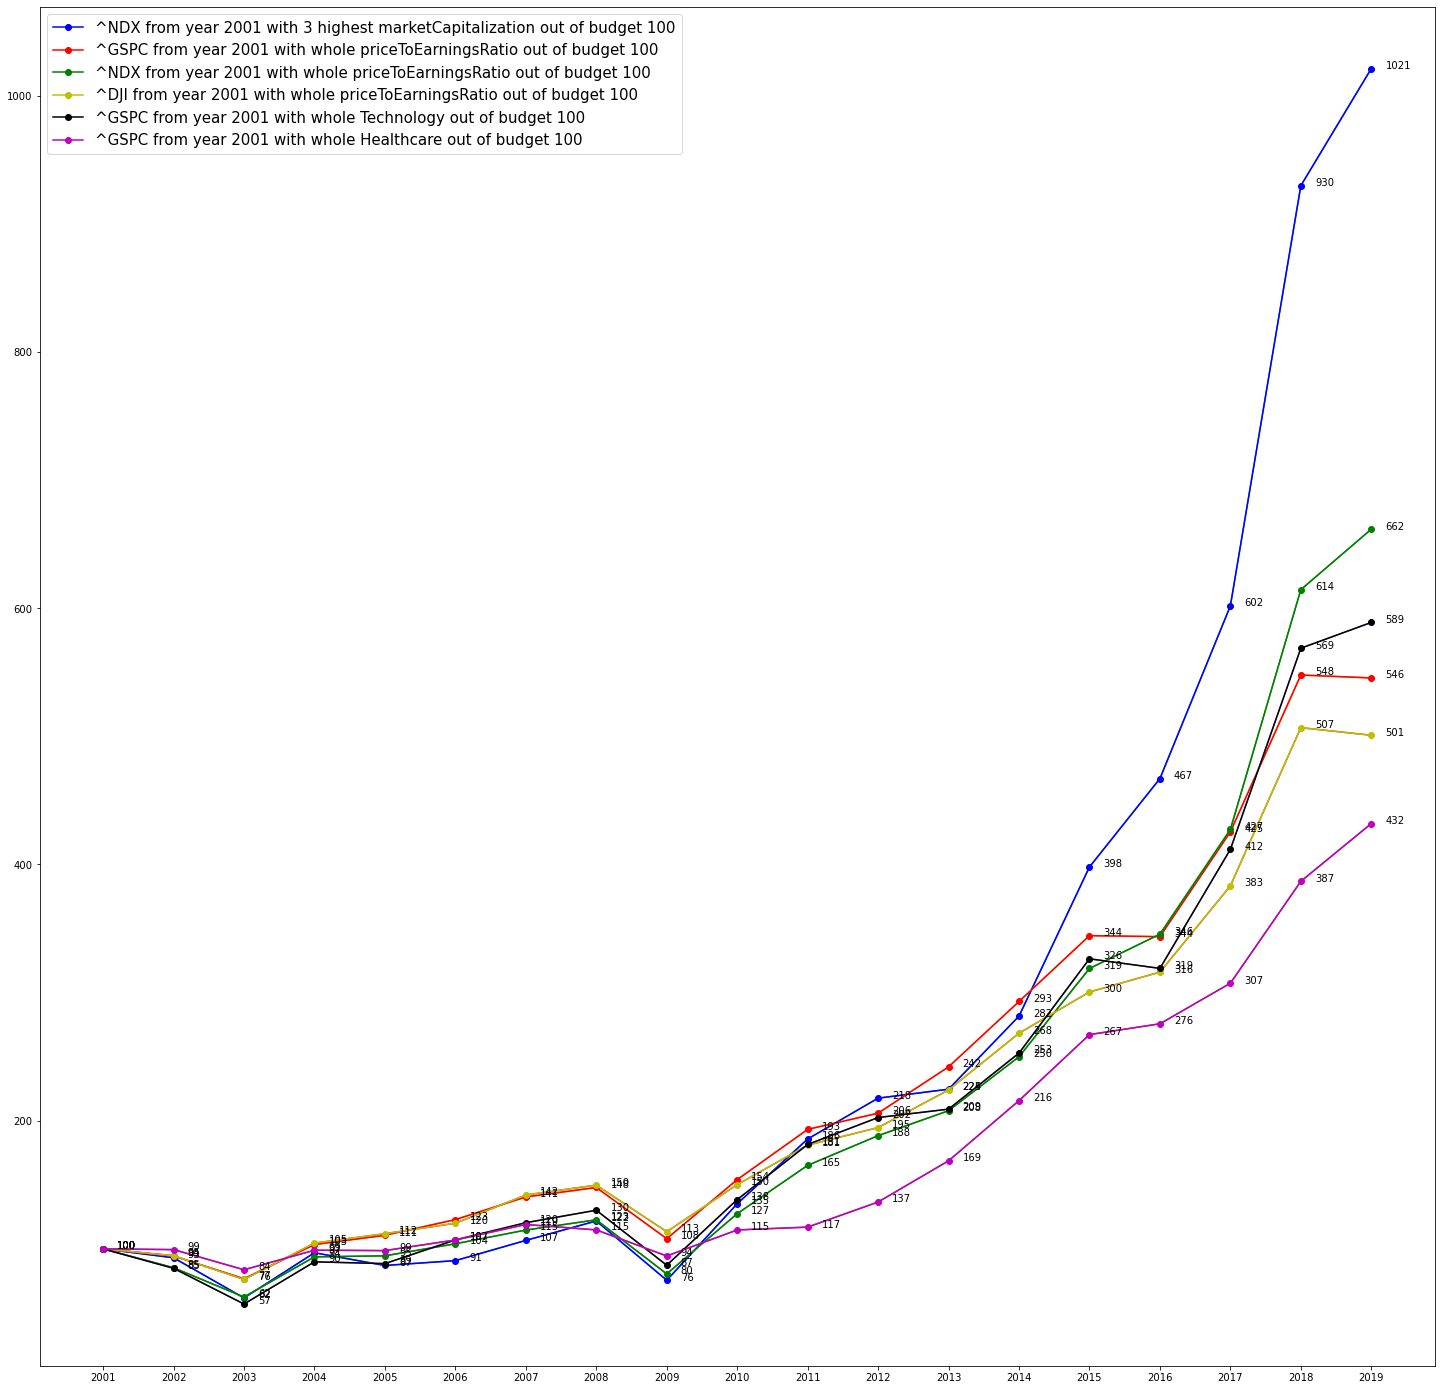

In [764]:
import matplotlib.pyplot as plt
import numpy as np

with open('clear_financials.json', 'r') as fin_f, \
    open('clear_time_series_monthly_adjusted.json', 'r') as month_f: 
    financials = json.load(fin_f)
    monthly_adjusted = json.load(month_f)
    
for company, prices in monthly_adjusted.items():
    temp = {}
    for date, price in prices.items():
        temp[datetime.strptime(date, '%Y-%m-%d')] = float(price)
    monthly_adjusted[company] = temp

def get_price_from_year_start(symbol, year):
    try:
        year_prices = {x: y for x, y in monthly_adjusted[symbol].items() if x.year==year}
        return year_prices[min(year_prices)]
    except Exception:

        return(0)

def get_companies_market_cap_dict(symbols, year):
    companies_cap = {}
    for symbol in symbols:
        try:
            companies_cap[symbol] = financials[symbol][str(year)]['marketCapitalization']
        except Exception:

            companies_cap[symbol]=0
       
    return companies_cap

def sell_portfolio(portfolio, year):
    amount = 0
    for symbol, num_shares in portfolio.items():
        amount += get_price_from_year_start(symbol, year)*num_shares
    return amount

def buy_portfolio(symbols, year, budget):
    companies_cap = get_companies_market_cap_dict(symbols, year)
    
    total_cap = sum(companies_cap.values())
    weight = budget / total_cap
    portfolio = {}
    for symbol, cap in companies_cap.items():
        price=get_price_from_year_start(symbol, year)
        price_1=get_price_from_year_start(symbol, year+1)
        if (price!=0) and (price_1!=0):
            
            portfolio[symbol] = (cap*weight)  / price  #for each symbol we have number of shares acquired
    
    return portfolio
    

def invest (index,start_year,parameter,criterion,size,budget):        

    portfolio_history={}
    portfolio_history[start_year]=budget
    portfolio_structure=[]
    
    for year in (range(start_year,2020)):          
        
        if year>start_year:
            portfolio_history[year]=sell_portfolio(portfolio,year)
        
        if year<2019:
            
            portfolio_structure=create_portfolio(index,year,parameter,criterion,size)
            
            portfolio=buy_portfolio(portfolio_structure,year,portfolio_history[year])
    
    return(portfolio_history,index,start_year,parameter,criterion,size,budget)
    

def plot (index,year,parameter,criterion,size,budget,color):
    
    portfolio_history,index,year_start,parameter,criterion,size,budget=invest(index,year,parameter,criterion,size,budget)
    variables=sorted(portfolio_history.items())
    (a, b) = zip(*variables) 
    plt.plot(a, b)
    if criterion=='whole': 
        plt.plot(a,b,color,label=f"{index} from year {year_start} with {criterion} {parameter} out of budget {budget}")
    else:
        plt.plot(a,b,color,label=f"{index} from year {year_start} with {size} {criterion} {parameter} out of budget {budget}")
    for x,y in zip(a, b): 
        plt.text(x+0.2, y, str(round(y)))

plot('^NDX',2001,'marketCapitalization','highest',3,100,'bo-') 
plot('^GSPC',2001,'priceToEarningsRatio','whole',3,100,'ro-')
plot('^NDX',2001,'priceToEarningsRatio','whole',3,100,'go-') 
plot('^DJI',2001,'priceToEarningsRatio','whole',3,100,'yo-')
plot('^GSPC',2001,'Technology','whole',3,100,'ko-')
plot('^GSPC',2001,'Healthcare','whole',3,100,'mo-')

plt.xticks(list(portfolio_history.keys()))  
plt.rc('figure', figsize=(25, 25))
plt.legend(fontsize=15,loc='best')
plt.show()

